In [1]:
import numpy as np
import pandas as pd
import os
bird_df = pd.read_csv("../data/birds.csv")

In [2]:
bird_df.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [3]:
#set up directories for train, test, and validation data
dir_train = "../data/train/"
dir_test = "../data/test/"
dir_v = "../data/valid/"

In [4]:
classes = os.listdir(dir_train)
n_classes = len(classes)
print("Total classes: ", n_classes)

Total classes:  525


In [5]:
#show some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def bird_image(direct, classes):
    path = direct + classes
    random_image = random.sample(os.listdir(path), 1)

    img = mpimg.imread(path + "/" + random_image[0])
    plt.imshow(img)
    plt.axis('off')
    plt.title(classes)
    print("Image shape: ", img.shape)
    plt.show()
    return img

Image shape:  (224, 224, 3)


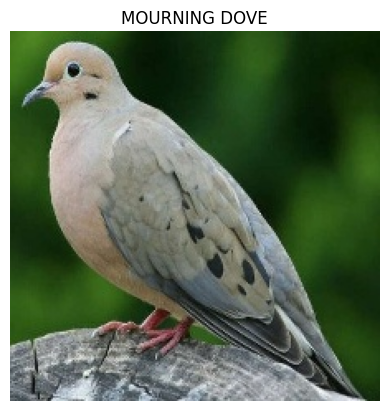

In [6]:
#show a random image with a random class
img = bird_image(dir_train, random.choice(classes))

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input

2023-12-07 22:42:11.587717: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 22:42:11.587772: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 22:42:11.620339: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 22:42:11.700239: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 22:42:12.594514: W tensorflow/compiler/tf2

In [12]:
#create generators
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)
valid_image_generator = ImageDataGenerator(rescale=1./255)

#set up generators
batch_size = 16
img_height = 224
img_width = 224
channels = 3

train_data = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=dir_train,
                                                              shuffle=True,
                                                              target_size=(img_height, img_width),
                                                              class_mode='categorical')

test_data = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                                directory=dir_test,
                                                                shuffle=False,
                                                                target_size=(img_height, img_width),
                                                                class_mode='categorical')

val_data = valid_image_generator.flow_from_directory(batch_size=batch_size,
                                                                directory=dir_v,
                                                                shuffle=False,
                                                                target_size=(img_height, img_width),
                                                                class_mode='categorical')
#plot accuracy and loss
def plot_accuracy_loss(history):
    #plot accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    #plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [9]:
#create a model
resnet = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
x = resnet.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(n_classes, activation='softmax')(x)

# Create the full model
model = Model(inputs=resnet.input, outputs=predictions)


2023-12-06 00:06:55.081361: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-06 00:06:55.204170: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-06 00:06:55.204221: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-06 00:06:55.205676: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-06 00:06:55.205714: I external/local_xla/xla/stream_executor

In [10]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

Epoch 1/100


2023-12-06 00:07:05.696191: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-06 00:07:07.759133: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f7530d22260 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-06 00:07:07.759166: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-12-06 00:07:07.768729: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1701839227.847646     548 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5290/5290 [==============================] - 587s 107ms/step - loss: 5.9183 - accuracy: 0.0157 - val_loss: 11167.3271 - val_accuracy: 0.0027
Epoch 2/100
5290/5290 [==============================] - 418s 79ms/step - loss: 5.2995 - accuracy: 0.0518 - val_loss: 4.8946 - val_accuracy: 0.0861
Epoch 3/100
5290/5290 [==============================] - 403s 76ms/step - loss: 4.9984 - accuracy: 0.0815 - val_loss: 4.6277 - val_accuracy: 0.1139
Epoch 4/100
5290/5290 [==============================] - 404s 76ms/step - loss: 4.8152 - accuracy: 0.1026 - val_loss: 4.5722 - val_accuracy: 0.1128
Epoch 5/100
5290/5290 [==============================] - 403s 76ms/step - loss: 4.5986 - accuracy: 0.1259 - val_loss: 9.2073 - val_accuracy: 0.1368
Epoch 6/100
5290/5290 [==============================] - 405s 77ms/step - loss: 4.2659 - accuracy: 0.1702 - val_loss: 3.6956 - val_accuracy: 0.2358
Epoch 7/100
5290/5290 [==============================] - 405s 77ms/step - loss: 3.7507 - accuracy: 0.2439 - val_loss: 3

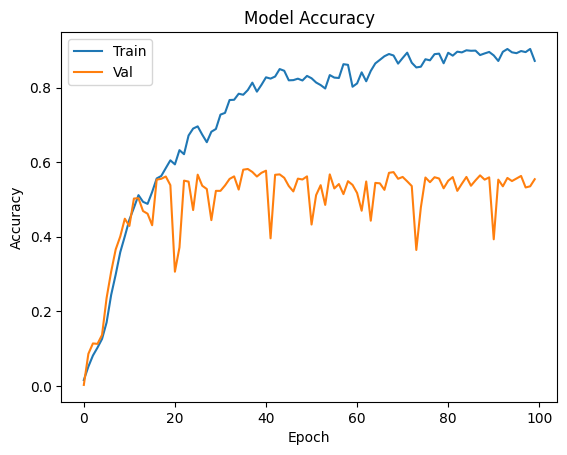

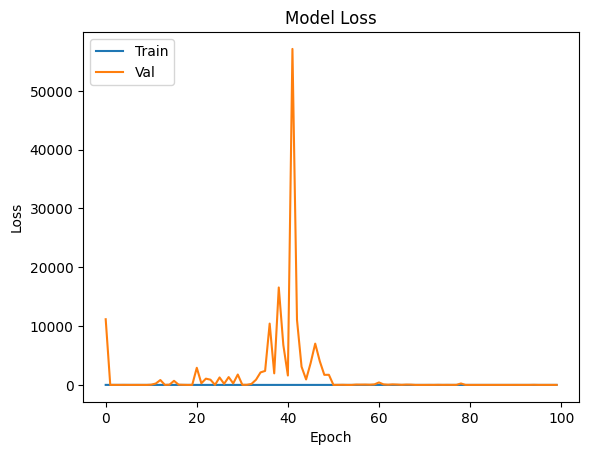

In [12]:
#prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=2)

#train model
epochs = 100
history = model.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=epochs,
    validation_data=val_data,
    validation_steps=len(val_data),
    # callbacks=[early_stopping]
)

plot_accuracy_loss(history)

In [15]:
#evaluate model
loss, acc = model.evaluate(test_data)
print("Accuracy: ", acc)
print("Loss: ", loss)

165/165 [==============================] - 4s 25ms/step - loss: 4.6578 - accuracy: 0.5882
Accuracy:  0.588190495967865
Loss:  4.657804489135742


In [21]:
#vgg16 model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input

#create a model
vgg16 = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
x = vgg16.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(n_classes, activation='softmax')(x)
model_vgg16 = Model(inputs=vgg16.input, outputs=predictions)


In [22]:
#compile the model
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#model summary
model_vgg16.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       295168    
          

Epoch 1/100
5290/5290 [==============================] - 390s 73ms/step - loss: 6.2748 - accuracy: 0.0029 - val_loss: 6.2669 - val_accuracy: 0.0019
Epoch 2/100
5290/5290 [==============================] - 377s 71ms/step - loss: 6.2586 - accuracy: 0.0030 - val_loss: 6.2685 - val_accuracy: 0.0019
Epoch 3/100
5290/5290 [==============================] - 377s 71ms/step - loss: 6.2582 - accuracy: 0.0031 - val_loss: 6.2701 - val_accuracy: 0.0019
Epoch 4/100
5290/5290 [==============================] - 377s 71ms/step - loss: 6.2580 - accuracy: 0.0031 - val_loss: 6.2709 - val_accuracy: 0.0019
Epoch 5/100
5290/5290 [==============================] - 377s 71ms/step - loss: 6.2580 - accuracy: 0.0031 - val_loss: 6.2711 - val_accuracy: 0.0019
Epoch 6/100
5290/5290 [==============================] - 377s 71ms/step - loss: 6.2580 - accuracy: 0.0031 - val_loss: 6.2713 - val_accuracy: 0.0019
Epoch 7/100
5290/5290 [==============================] - 377s 71ms/step - loss: 6.2580 - accuracy: 0.0030 - val_

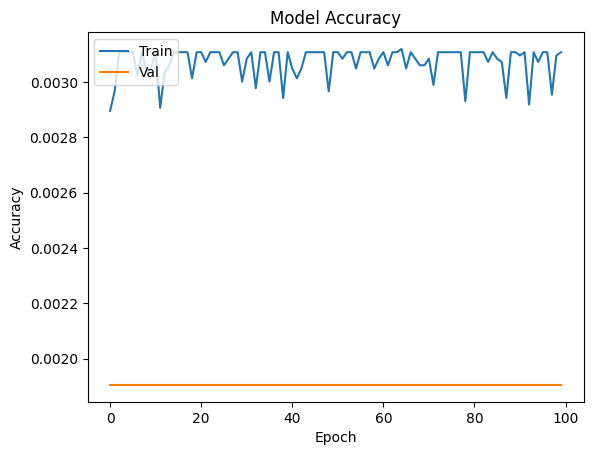

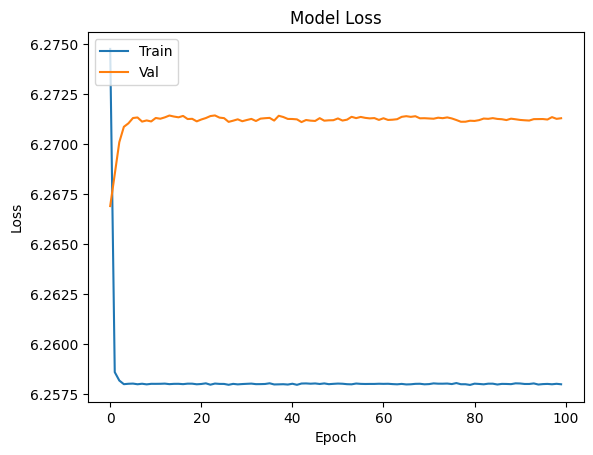

In [23]:
#train model
epochs = 100
history = model_vgg16.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=epochs,
    validation_data=val_data,
    validation_steps=len(val_data),
    # callbacks=[early_stopping]
)

plot_accuracy_loss(history)

In [24]:
#evaluate model
loss, acc = model_vgg16.evaluate(test_data)
print("Accuracy: ", acc)
print("Loss: ", loss)

165/165 [==============================] - 7s 43ms/step - loss: 6.2713 - accuracy: 0.0019
Accuracy:  0.0019047618843615055
Loss:  6.271306037902832


In [9]:
#inception model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input

#create a model
inception = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
x = inception.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(n_classes, activation='softmax')(x)
model_inception = Model(inputs=inception.input, outputs=predictions)


2023-12-07 22:42:43.152000: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-07 22:42:43.277802: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-07 22:42:43.277863: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-07 22:42:43.279505: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-07 22:42:43.279543: I external/local_xla/xla/stream_executor

In [10]:
#compile the model
model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#model summary
model_inception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0]'] 
                                                                                                  
 conv2d_1 (Conv2D)           (None, 109, 109, 32)         9216      ['activation[0][0]']          
          

In [11]:
#train model
epochs = 100
history = model_inception.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=epochs,
    validation_data=val_data,
    validation_steps=len(val_data),
    # callbacks=[early_stopping]
)

plot_accuracy_loss(history)

Epoch 1/100


2023-12-07 22:43:00.416243: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-07 22:43:04.626973: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f1050d15790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-07 22:43:04.627005: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-12-07 22:43:04.637341: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1702006984.719951     586 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5290/5290 [==============================] - 412s 72ms/step - loss: 6.2856 - accuracy: 0.0024 - val_loss: 6.2667 - val_accuracy: 0.0019
Epoch 2/100
5290/5290 [==============================] - 360s 68ms/step - loss: 6.2585 - accuracy: 0.0031 - val_loss: 6.2693 - val_accuracy: 0.0019
Epoch 3/100
5290/5290 [==============================] - 352s 66ms/step - loss: 6.2581 - accuracy: 0.0031 - val_loss: 6.2705 - val_accuracy: 0.0019
Epoch 4/100
5290/5290 [==============================] - 354s 67ms/step - loss: 6.1639 - accuracy: 0.0044 - val_loss: 5.8114 - val_accuracy: 0.0061
Epoch 5/100
5290/5290 [==============================] - 343s 65ms/step - loss: 5.6339 - accuracy: 0.0149 - val_loss: 5.4381 - val_accuracy: 0.0225
Epoch 6/100
5290/5290 [==============================] - 335s 63ms/step - loss: 5.2848 - accuracy: 0.0347 - val_loss: 4.7290 - val_accuracy: 0.0811
Epoch 7/100
5290/5290 [==============================] - 337s 64ms/step - loss: 4.8386 - accuracy: 0.0843 - val_loss: 4.2709

NameError: name 'plot_accuracy_loss' is not defined

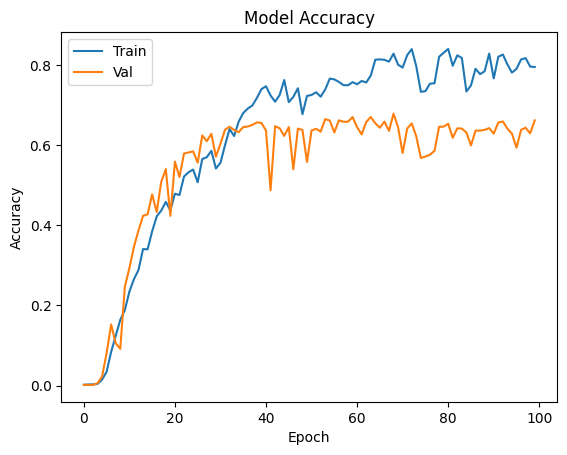

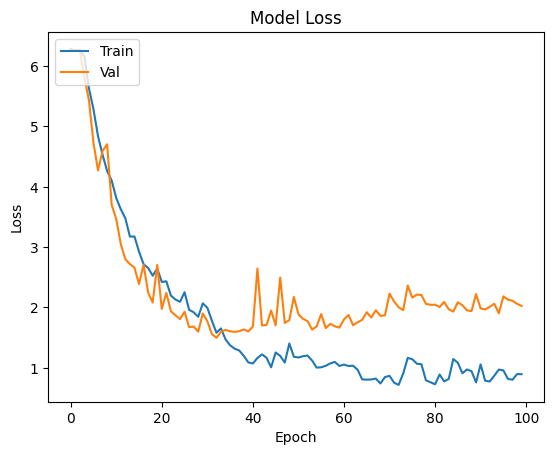

In [13]:
plot_accuracy_loss(history)
#ignore the error in the previous cell (forgot to run the code creating the method 💀)

In [14]:
#evaluate model
loss, acc = model_inception.evaluate(test_data)
print("Accuracy: ", acc)
print("Loss: ", loss)

165/165 [==============================] - 3s 18ms/step - loss: 1.7439 - accuracy: 0.6926
Accuracy:  0.6925714015960693
Loss:  1.7439324855804443
